**STOCK PRICE PREDICTION SYSTEM**



**DIALOG AXIATA-Share Historical Data**(daily 02/25/2022-02/25/2024)


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error
import os


Load and Prepare the Data

In [5]:
# Load the dataset
df = pd.read_csv('DIALOGAXIATA.csv')

data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on (80% of the dataset)
training_data_len = math.ceil(len(dataset) * .8)



In [ ]:
dataset

array([[10655.35],
       [10649.3 ],
       [10638.06],
       ...,
       [ 5991.29],
       [ 5997.12],
       [ 5973.46]])

Scale the Data

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



Create the Training Dataset

In [7]:
# Create the training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3-dimensional [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


Build and Train the LSTM Model

In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


319/319 [==============================] - 9s 17ms/step - loss: 0.0140


Create the Testing Dataset

In [9]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


Get the Models Predicted Price Values

In [10]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Undo scaling


3/3 [==============================] - 1s 10ms/step


Evaluate the Model

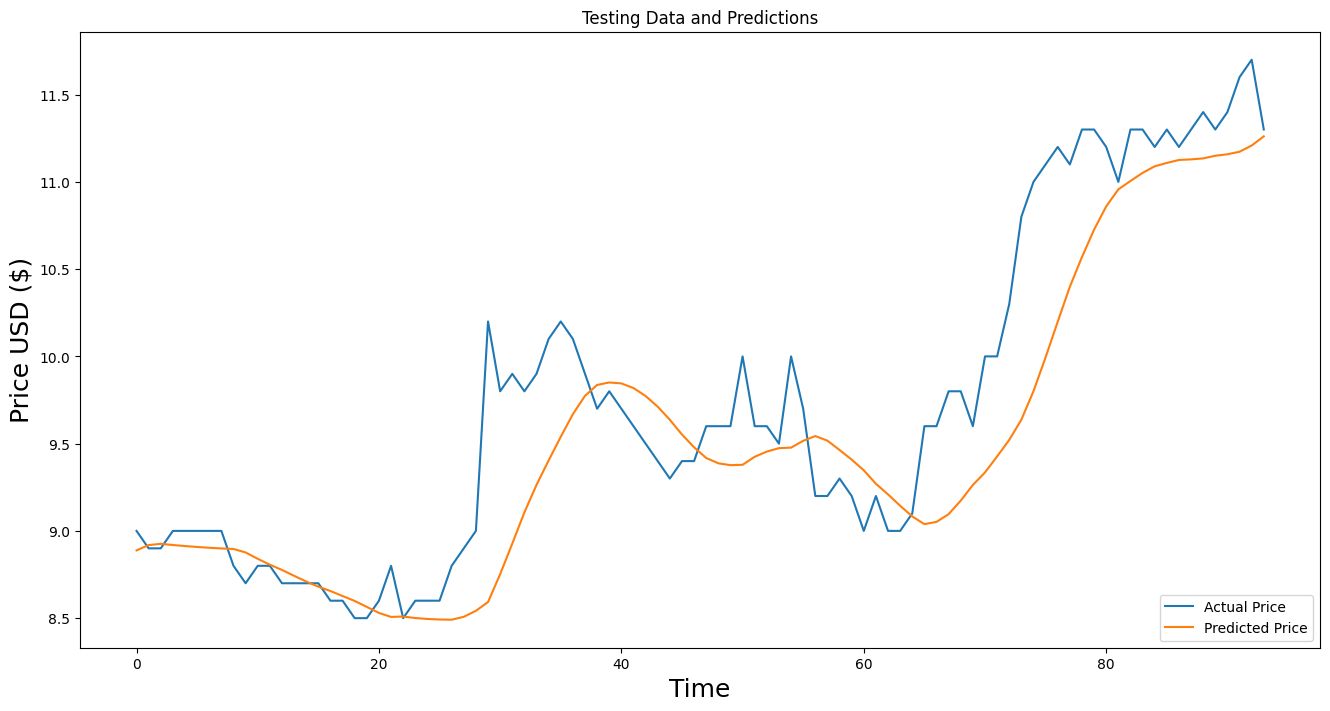

In [13]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Extract the actual prices for the test period
test_actual = data[training_data_len:].values

plt.figure(figsize=(16,8))
plt.title('Testing Data and Predictions')
plt.xlabel('Time', fontsize=18)  # Adjust as per your dataset
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')  # 'predictions' obtained from earlier step
plt.legend(loc='lower right')
plt.show()

In [12]:
# Calculate the value of RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f"RMSE: {rmse}")


RMSE: 0.2309201971013495


In [16]:
print(predictions)

[[ 8.888292 ]
 [ 8.918678 ]
 [ 8.925925 ]
 [ 8.919083 ]
 [ 8.913172 ]
 [ 8.9079075]
 [ 8.903362 ]
 [ 8.899552 ]
 [ 8.896451 ]
 [ 8.876502 ]
 [ 8.840167 ]
 [ 8.806251 ]
 [ 8.776356 ]
 [ 8.742698 ]
 [ 8.709931 ]
 [ 8.680494 ]
 [ 8.655537 ]
 [ 8.626808 ]
 [ 8.598544 ]
 [ 8.564487 ]
 [ 8.530137 ]
 [ 8.507022 ]
 [ 8.509295 ]
 [ 8.500683 ]
 [ 8.495358 ]
 [ 8.492353 ]
 [ 8.491016 ]
 [ 8.507771 ]
 [ 8.542103 ]
 [ 8.592439 ]
 [ 8.75197  ]
 [ 8.927018 ]
 [ 9.106267 ]
 [ 9.263553 ]
 [ 9.403637 ]
 [ 9.539358 ]
 [ 9.6690445]
 [ 9.773881 ]
 [ 9.8363695]
 [ 9.850505 ]
 [ 9.8451805]
 [ 9.818724 ]
 [ 9.773159 ]
 [ 9.711435 ]
 [ 9.636782 ]
 [ 9.552291 ]
 [ 9.478916 ]
 [ 9.417845 ]
 [ 9.387386 ]
 [ 9.376733 ]
 [ 9.378777 ]
 [ 9.424695 ]
 [ 9.454539 ]
 [ 9.474177 ]
 [ 9.477102 ]
 [ 9.516204 ]
 [ 9.543536 ]
 [ 9.517067 ]
 [ 9.463779 ]
 [ 9.408481 ]
 [ 9.347199 ]
 [ 9.270093 ]
 [ 9.209078 ]
 [ 9.144095 ]
 [ 9.083154 ]
 [ 9.038694 ]
 [ 9.051692 ]
 [ 9.0961275]
 [ 9.173498 ]
 [ 9.26339  ]
 [ 9.335012 ]
 [ 9.4